# Forecasting passenger traffic challenge from HackerRank

This notebook is used to solve the 'Forecasting passenger traffic' challenge of the Artificial Intelligence module fo HackerRank. To check this challenge, go to https://www.hackerrank.com/challenges/forecasting-passenger-traffic/problem.

Therefore, the objective of this notebook is to forecast an airport total passenger monthly count for the next 12 months given an airport's total monthly passenger counts for a period of N previous months.

The notebook is dividede as follows:
    
1. Data exploration
2. Data modelling 
3. Forecasting
4. Conclusion

## 1. Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

In [1]:
import pandas as pd
import numpy as np
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./opt/anaconda3/lib/python3.8/site-packages (0.24.2)


In [2]:
df = pd.read_csv('/Users/leuzinger/Dropbox/Data Science/HackerRank/forecasting-passenger-traffic-testcases/input/input00.txt',delimiter = "\t")
df.reset_index(inplace=True)
df.head()

index       60
0  MonthNum_1  1226800
1  MonthNum_2   926891
2  MonthNum_3   782725
3  MonthNum_4  1023038
4  MonthNum_5  1126293

In [3]:
df.rename(columns={"index": "Month", "60": "passenger_count"},inplace=True)
df.index = np.arange(1, len(df) + 1)
df.head()

Month  passenger_count
1  MonthNum_1          1226800
2  MonthNum_2           926891
3  MonthNum_3           782725
4  MonthNum_4          1023038
5  MonthNum_5          1126293

In [4]:
from datetime import datetime, timedelta
from collections import OrderedDict

df_date = df.copy()

# Sample start and end dates
start = datetime(year=2000, month=1, day=1)
end = datetime(year=2006, month=1, day=1)

# Get list of months >= start and < end

months_ = OrderedDict(((start + timedelta(_)).strftime("%Y-%m-01"), 0) for _ in range((end - start).days))
months_list = list(months_.items())
months=[]
months = [months[0] for months in months_list]

for i in range(60):
    month_str = months[i]
    #date_time_month = datetime.strptime(month_str, '%Y-%m-%d').date()
    #df_date.iloc[i,0] = date_time_month
    df_date.iloc[i,0] = month_str
df_date.head()    

Month  passenger_count
1  2000-01-01          1226800
2  2000-02-01           926891
3  2000-03-01           782725
4  2000-04-01          1023038
5  2000-05-01          1126293

In [5]:
print(df.dtypes)
print(df.shape)

Month              object
passenger_count     int64
dtype: object
(60, 2)


The dataset contains only two columns and 60 lines.

The first column of the dataset contains strings denoting the month number and the second column cotains integers denoting the number of passengers for that month.

### Data vizualization

"The first thing to do in any data analysis task is to plot the data because they enable many features of the data to be visualised, including patterns, unusual observations, changes over time, and relationships between variables" (HYNDMAN; ATHANASOPOULOS, 2018).

Therefore, we will start our analysis making some graphics that are useful for understanding timeseries. The obvious graph to start is a time plot.

The time plot shows that there is considerable varation from one month to the next. However, there does not seem to be a clear trend. Besides, the number of passengers per month does not seem to be affected by seasonal (fluctuations with a fixed frequency) factors. Nonetheless, the time series seems to be cyclic (fluctuations without a fixed frequency).

Next, we check for seasonal patterns. The seasonal plot and seasonal polar plot confirm that there is no seasonality in the data considering the same months year by year.

Besides, we also need to look for autocorrelation in the dataset. From the autocorrelation function (ACF) plot, we see that values for the ACF are within 95% confidence interval (represented by the solid gray line) for lags > 0, which verifies that our data doesn’t have any autocorrelation. This is also confirmed by the partial autocorrelation function (PACF). Therefore, we can consider our time series can be considered **white noise**.

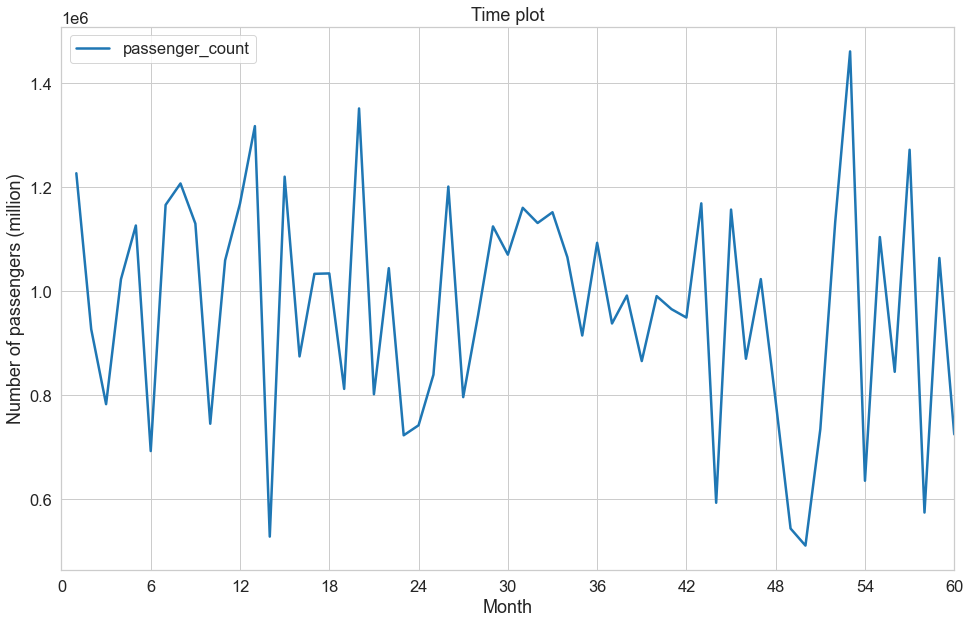

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

time_plot = df_date
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=time_plot)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Time plot')
ax.set_xlim(1,60)
ax.set_xticks(np.arange(0, 60 + 1, 6))
plt.show()

In [7]:
df_seasonal = pd.DataFrame(columns=np.arange(1, 12 + 1),index = ['year 1','year 2','year 3','year 4','year 5'])
for i in range(5):
    for j in range(12):
        n = 12*i+j
        df_seasonal.iloc[i,j] = df.iloc[n,1]
df_seasonal.head()

1        2        3        4        5        6        7   \
year 1  1226800   926891   782725  1023038  1126293   692565  1165880   
year 2  1317458   528045  1220238   874557  1033389  1034165   812094   
year 3   839471  1201199   796265   953887  1124602  1070181  1160366   
year 4   937898   991612   865649   990565   965414   949248  1168905   
year 5   543605   510786   734714  1133025  1461091   635481  1104107   

             8        9        10       11       12  
year 1  1207156  1129954   745100  1059346  1168555  
year 2  1351419   801822  1044266   722871   742100  
year 3  1131150  1151813  1065316   914800  1093034  
year 4   593112  1156922   870095  1023262   788327  
year 5   844960  1271967   574319  1063900   724737

[]

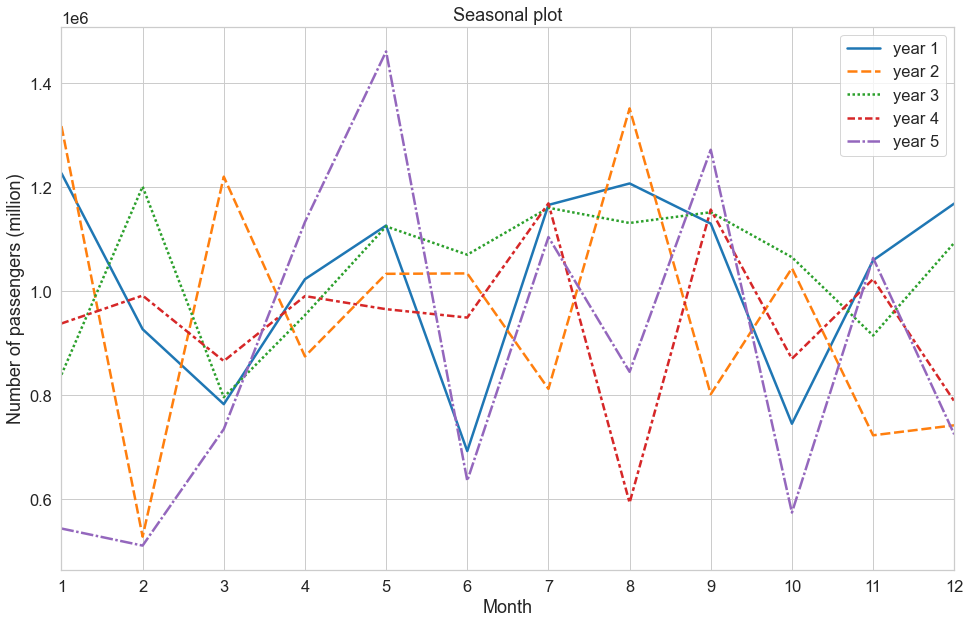

In [8]:
seasonal_plot = df_seasonal.astype(float).copy().transpose()
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=seasonal_plot)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Seasonal plot')
ax.set_xlim(1,12)
ax.set_xticks(np.arange(1, 12 + 1, 1))
plt.plot()

In [9]:
import plotly.graph_objects as go


categories = list(df_seasonal.columns)
categories = [*categories, categories[0]]
categories = [str(i) for i in categories]

print(type(categories))
year_1 = list(df_seasonal.iloc[0,:])
year_2 = list(df_seasonal.iloc[1,:])
year_3 = list(df_seasonal.iloc[2,:])
year_4 = list(df_seasonal.iloc[3,:])
year_5 = list(df_seasonal.iloc[4,:])

year_1 = [*year_1, year_1[0]]
year_2 = [*year_2, year_2[0]]
year_3 = [*year_3, year_3[0]]
year_4 = [*year_4, year_4[0]]
year_5 = [*year_5, year_5[0]]
#print(categories)
#print(year_1)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=year_1, theta=categories, name='Year 1'),
        go.Scatterpolar(r=year_2, theta=categories, name='Year 2'),
        go.Scatterpolar(r=year_3, theta=categories, name='Year 3'),
        go.Scatterpolar(r=year_4, theta=categories, name='Year 4'),
        go.Scatterpolar(r=year_5, theta=categories, name='Year 5')
    ],
    layout=go.Layout(
       title=go.layout.Title(text='Polar seasonal plot'),
        polar={'radialaxis': {'visible': True},'bgcolor':'PapayaWhip'},
        showlegend=True,
        width=750,
        height=750,
        font=dict(
        size=18,
        )
    )
)

fig.show()

<class 'list'>


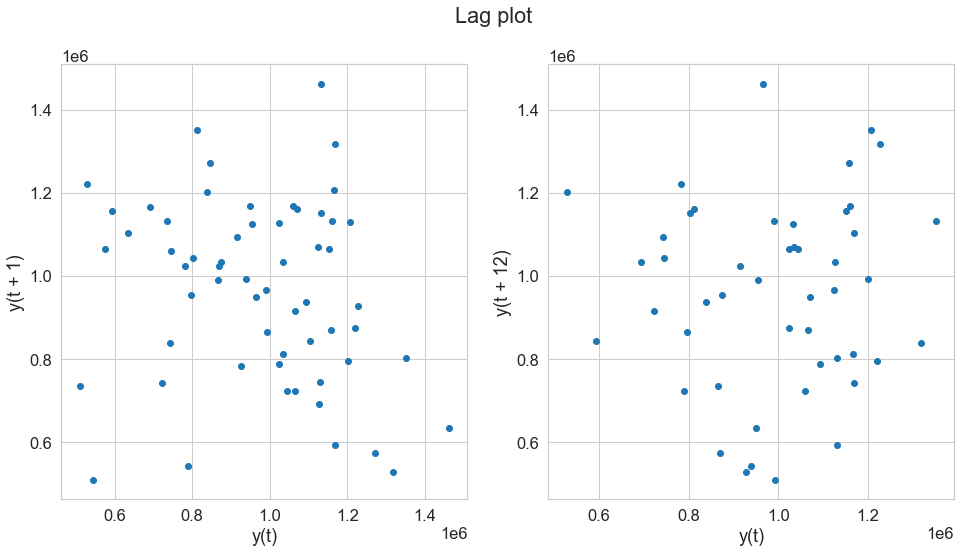

In [10]:
fig_lag = plt.figure(figsize=(16, 8))
#fig, ax = plt.subplots(1, 2, figsize=(12, 7))
#ax[0].set_xlabel('Time')
#ax[0].set_ylabel('Amplitude')
#ax[0].axhline(y=0, color='k')
fig_lag.suptitle('Lag plot')
plt.subplot(121)
pd.plotting.lag_plot(df_date['passenger_count'], lag= 1)
plt.subplot(122)
pd.plotting.lag_plot(df_date['passenger_count'], lag= 12)
plt.show()

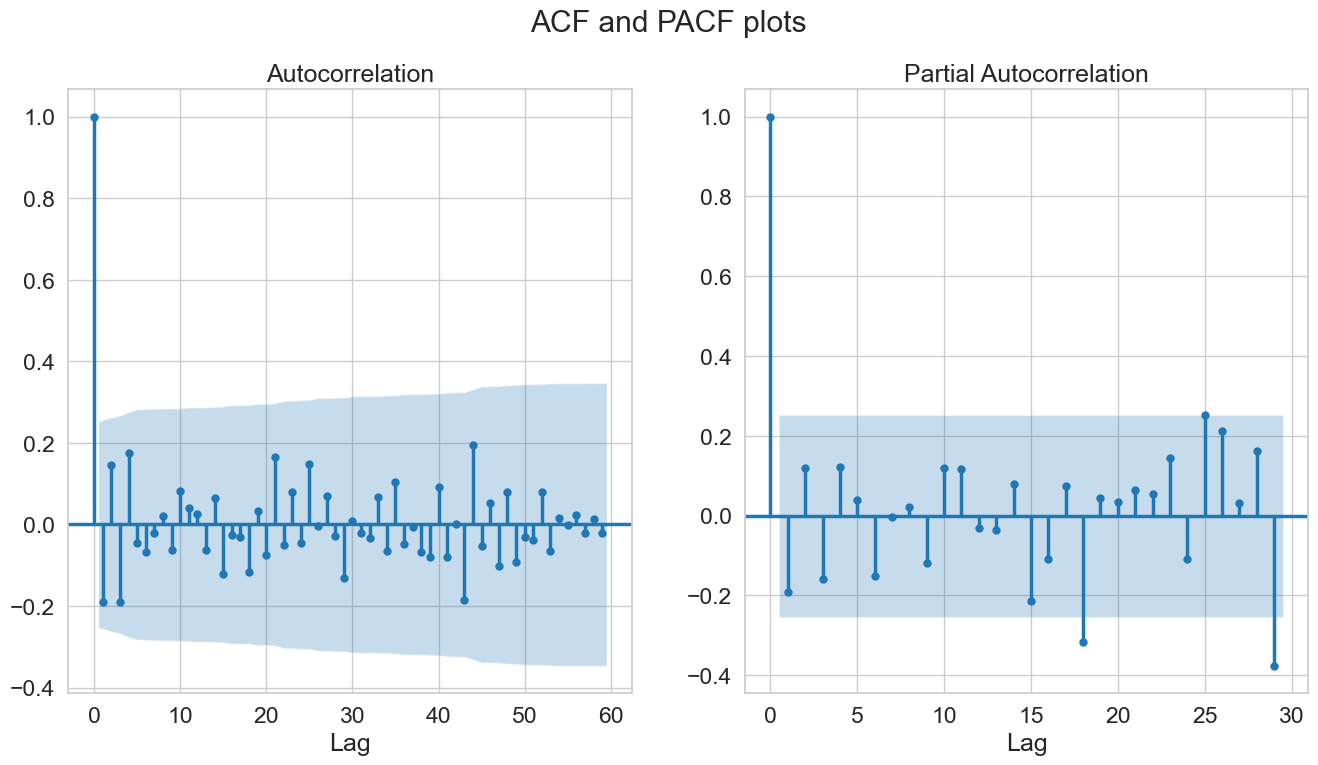

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig_auto, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_auto.suptitle('ACF and PACF plots')
plot_acf(df_date['passenger_count'], lags=59, ax=axes[0])
axes[0].set_xlabel('Lag')
plot_pacf(df_date['passenger_count'], lags=29, ax=axes[1])
axes[1].set_xlabel('Lag')
plt.show()

## 2. Data modelling

After the exploratory analysis of the dataset, in which we concluded that the time series is white noise, we can now try to create a model to forecast the passenger counts for the next months.

First we split our dataset in training and testing sets. We will use the first 4 years as the training set and the 5th year as the testing set.

We start with a simple average forecast. In this method, "the forecasts of all future values are equal to the average (or “mean”) of the historical data" [(HYNDMAN; ATHANASOPOULOS, 2018)](https://otexts.com/fpp2/). We verify that, as the mean absolute scaled error (MASE) is greater than 1, **the average forecast actually performs worse than the naive method** and, therefore, does not adds value.

The results of the exploratory analysis indicated that the time series is white noise, and, therefore, is stationary, i.e., its properties does not depend on the time at which the series is observed. Before continuing, let's check this using two tests: 

1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

In the ADF test, the null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the p-value interpretation is just the opposite of ADH test. So, the time series is stationary if the null hypothesis is valid (p-value > 0.05).

The tests confirm that the data series is stationary. The p-value is 6.73e-05 for the ADF test, rejecting the null hyposthesis of non-stationarity, and is 0.10 for the KPSS test, confirming the null hypothesis of stationarity.

Given that our time series is stationary, , we can try some ARIMA models. First, we use an autoregressive (AR) model, where "we forecast the variable of interest using a linear combination of past values of the variable" (HYNDMAN; ATHANASOPOULOS, 2018). An AR model of order 3 is the best fit for the training data. We see that the AR(3) model performs better than the average forecast. However, once more MASE is greater than 1, **so the AR model also performs worse than the naive method**.

The next model we test is a moving average (MA) model. It "uses past forecast errors in a regression-like model" (HYNDMAN; ATHANASOPOULOS, 2018). We create an MA model by using an ARIMA model and setting the order of the AR model the differencing to zero. We verify that a MA model of order 16 is the best fit for the training data. This MA(16) model performs better than the previous models we tested, **but it stills performs worse than the naive method**, as the MASE is slightly above 1.

Finally, we can try some models the combines AR and MA. We use an ARMA model first, and then test an ARIMA model. The difference between the two is that while the ARMA model only combines autoregression and moving average models, the ARIMA model also uses differencing (HYNDMAN; ATHANASOPOULOS, 2018). We create an ARMA model by using an ARIMA model and setting the order of the differencing to zero, in an analagous way we created the MA model. 

We use two criteria to evaluate the models, the AICc and the MASE. Both cirteria give suggests different orders for the ARMA model: (8,10) and (10,10). Testing both models with the test set, we verify that the ARMA(10,10) performs better for all other types of erros, MAE, RMSE, and MAPE. Therefore the best ARMA model for our data have order of the autoregressive part of 10 and order of the moving average part of 10. **This model have a MASE of 0.833, performing better than the other models and is the first one to performe better htan the naive method**.

Regarding the ARIMA model, once our time series is stationary, we should use d=0. Increasing d, would only make the model perfom worse. Nonetheless, we make a few tests to check this. The best ARIMA model have order of the autoregressive part of 10, order of the moving average part of 10, and order of the differencing part 0 as expected.


In [37]:
df_train_test = df_date.copy()

train_set = df_date.iloc[:48]
test_set = df_date.iloc[48:60,:]
print(train_set.head())
print(test_set.head())

        Month  passenger_count
1  2000-01-01          1226800
2  2000-02-01           926891
3  2000-03-01           782725
4  2000-04-01          1023038
5  2000-05-01          1126293
         Month  passenger_count
49  2004-01-01           543605
50  2004-02-01           510786
51  2004-03-01           734714
52  2004-04-01          1133025
53  2004-05-01          1461091


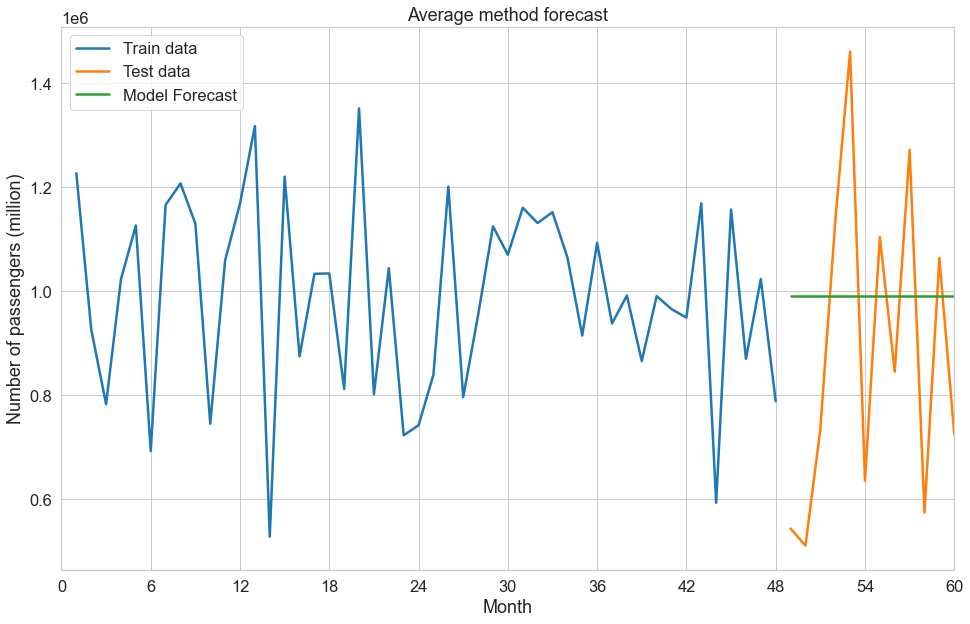

In [38]:
y_hat_avg = test_set.copy()
y_hat_avg['avg_forecast'] = train_set['passenger_count'].mean()

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=train_set['passenger_count'])
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Average method forecast')
ax.set_xlim(1,60)
ax.set_xticks(np.arange(0, 60 + 1, 6))
bx = sns.lineplot(data=test_set['passenger_count'])
cx = sns.lineplot(data=y_hat_avg['avg_forecast'])
plt.legend(labels=["Train data","Test data","Model Forecast"])
plt.show()

In [39]:
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error

def MASE_func(training_series, testing_series, prediction_series):

    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MAE = median_absolute_error(test_set['passenger_count'], y_hat_avg['avg_forecast'])
RMSE = mean_squared_error(test_set['passenger_count'], y_hat_avg['avg_forecast'],squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], y_hat_avg['avg_forecast'])
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],y_hat_avg['avg_forecast'])
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=273615.000
RMSE=319555.388
MAPE=0.398
MASE=1.228


In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

# ADF Test
result = adfuller(df_date['passenger_count'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_date['passenger_count'], nlags='auto', regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
warnings.filterwarnings("ignore")

ADF Statistic: -4.75133053471143
p-value: 6.732637850233903e-05
Critial Values:
   1%, -3.5506699942762414
Critial Values:
   5%, -2.913766394626147
Critial Values:
   10%, -2.5946240473991997

KPSS Statistic: 0.275981
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [41]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

sel = ar_select_order(train_set['passenger_count'], 12, trend='n', old_names=False)
sel.ar_lags
res_ar = sel.model.fit()
print(res_ar.summary())
warnings.filterwarnings("ignore")

                            AutoReg Model Results                             
Dep. Variable:        passenger_count   No. Observations:                   48
Model:                     AutoReg(3)   Log Likelihood                -614.820
Method:               Conditional MLE   S.D. of innovations         207673.579
Date:                Thu, 20 May 2021   AIC                             24.665
Time:                        18:48:38   BIC                             24.826
Sample:                             3   HQIC                            24.725
                                   48                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
passenger_count.L1     0.0774      0.136      0.571      0.568      -0.188       0.343
passenger_count.L2     0.5525      0.113      4.902      0.000       0.332       0.773
passenger_count.L3  

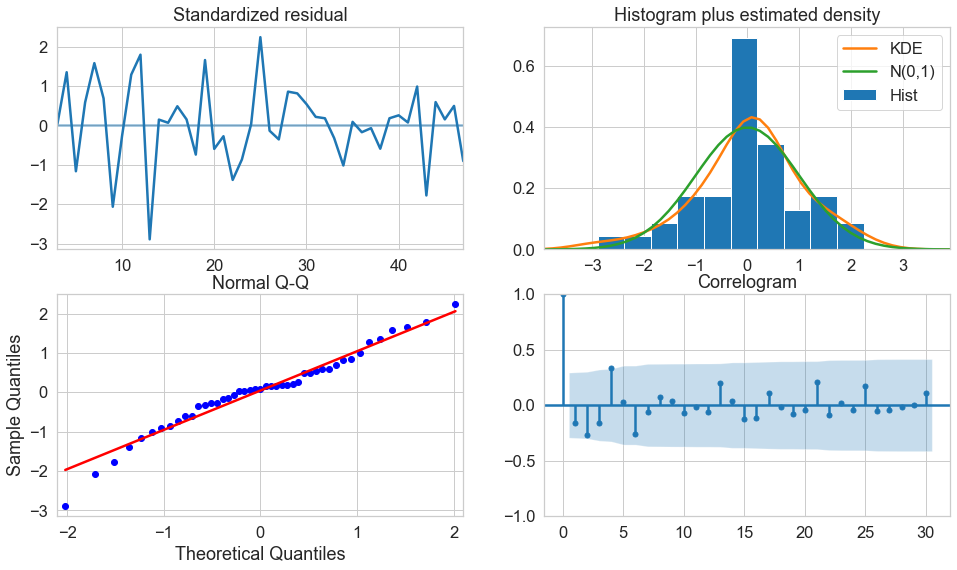

In [42]:
fig = plt.figure(figsize=(16,9))
fig = res_ar.plot_diagnostics(lags=30, fig=fig)

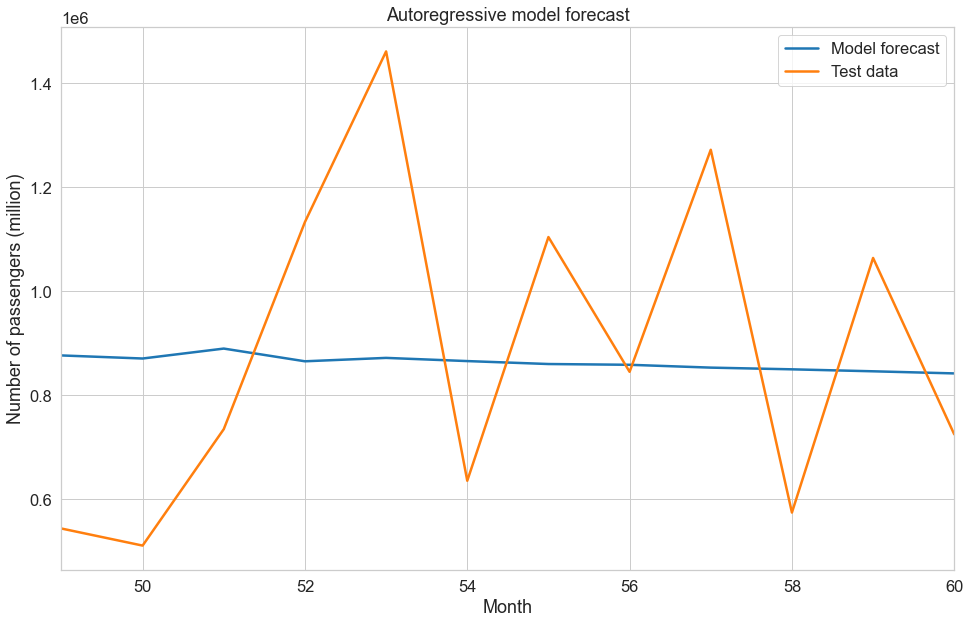

In [43]:
yhat_AR = res_ar.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_AR)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Autoregressive model forecast')
ax.set_xlim(49,60)
bx = sns.lineplot(data=test_set['passenger_count'])
plt.legend(labels=["Model forecast","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [44]:
MAE = median_absolute_error(test_set['passenger_count'], yhat_AR)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_AR,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_AR)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_AR)
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=256002.627
RMSE=303953.582
MAPE=0.328
MASE=1.148


In [45]:
from statsmodels.tsa.arima.model import ARIMA

MA = pd.DataFrame(columns=['order','MAE','RMSE','MAPE','MASE'])
for i in range(31):
    MA_model = ARIMA(train_set['passenger_count'], order=(0, 0, i))
    res_MA = MA_model.fit()
    yhat_MA = res_MA.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)
    try:
        MAE = median_absolute_error(test_set['passenger_count'], yhat_MA)
    except:
        pass
    try:
        RMSE = mean_squared_error(test_set['passenger_count'], yhat_MA,squared=False)
    except:
        pass 
    try:
        MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_MA)
    except:
        pass     
    try:
        MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_MA)
    except:
        pass            
    MA2 = pd.Series([i,MAE,RMSE,MAPE,MASE], index=MA.columns )
    #MA2 = pd.DataFrame([[i,MAE,RMSE,MAPE,MASE]])
    MA = MA.append(MA2,ignore_index=True)
    #print(MA)
warnings.filterwarnings("ignore")
MA.head()

order       MAE           RMSE      MAPE      MASE
0    0.0  273615.0  319555.387541  0.397676  1.228362
1    1.0  273615.0  319555.387541  0.397676  1.228362
2    2.0  273615.0  317122.852992  0.394410  1.220768
3    3.0  273615.0  314608.401856  0.391102  1.213603
4    4.0  273615.0  311620.045576  0.386122  1.198852

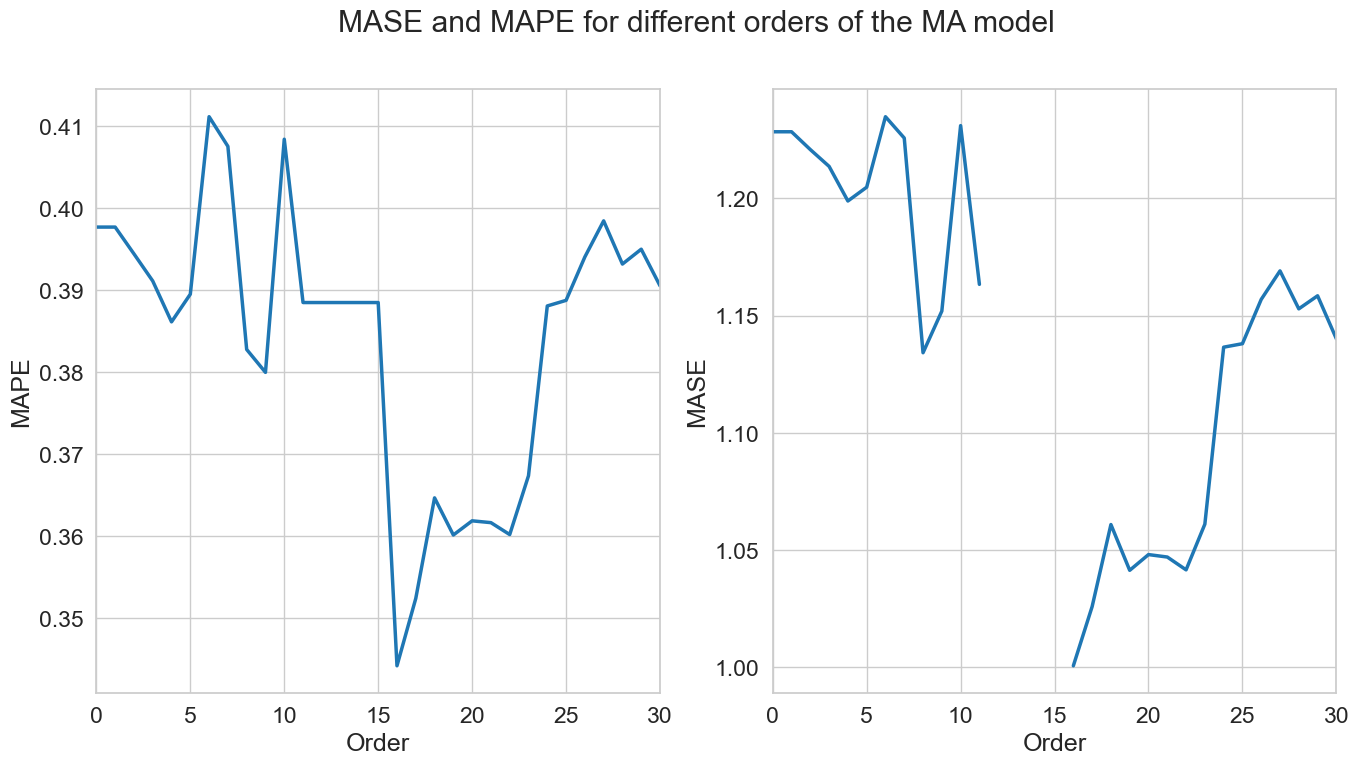

In [46]:
fig_MA, axes = plt.subplots(1,2,figsize=(16,8), dpi= 100)
fig_MA.suptitle('MASE and MAPE for different orders of the MA model')

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MAPE'], ax=axes[0])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[0].set(xlabel='Order', ylabel = 'MAPE')
axes[0].set_xlim(0,30)

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lineplot(data=MA['MASE'], ax=axes[1])
#ax.set_xticks(np.arange(0, 60 + 1, 1))
axes[1].set(xlabel='Order', ylabel = 'MASE')
axes[1].set_xlim(0,30)

plt.show()

In [47]:
print('Minimum ',MA[['MAE']].idxmin())
print('Minimum ',MA[['RMSE']].idxmin())
print('Minimum ',MA[['MAPE']].idxmin())
print('Minimum ',MA[['MASE']].idxmin())

Minimum  MAE    17
dtype: int64
Minimum  RMSE    16
dtype: int64
Minimum  MAPE    16
dtype: int64
Minimum  MASE    16
dtype: int64


In [ ]:
from statsmodels.tsa.arima.model import ARIMAResults

MA_model = ARIMA(train_set['passenger_count'], order=(0, 0, 16))
res_MA = MA_model.fit()

print(res_MA.summary())

warnings.filterwarnings("ignore")

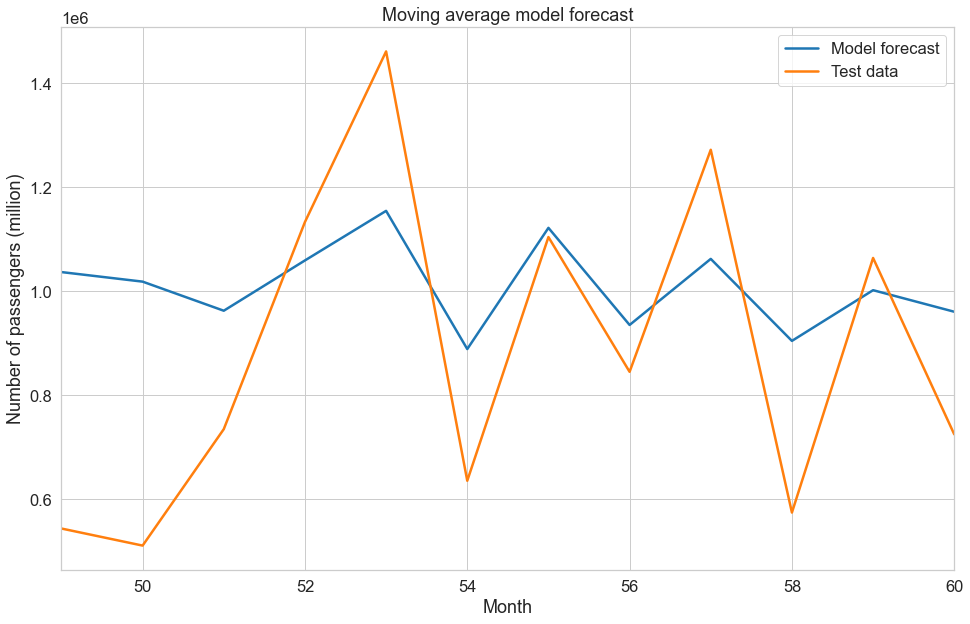

In [49]:
yhat_MA = res_MA.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_MA)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Moving average model forecast')
ax.set_xlim(49,60)
bx = sns.lineplot(data=test_set['passenger_count'])
plt.legend(labels=["Model forecast","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [50]:
MAE = median_absolute_error(test_set['passenger_count'], yhat_MA)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_MA,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_MA)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_MA)
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE=231722.527
RMSE=279454.663
MAPE=0.344
MASE=1.001


In [51]:
# calculate AICc from AIC
def calculate_AICc(train, arma_order):
    model = ARIMA(train, order=arma_order)
    model_fit = model.fit()
    aic = model_fit.aic
    parameters = sum(arma_order)
    T = len(train)
    aicc = aic+(2*(parameters+2)*(parameters+3))/(T-(parameters+3))
    return aicc  

In [59]:
# evaluate an ARIMA model for a given order (p,d,q)
  
# evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_ARIMA(train, test, p_values, d_values, q_values, matriz):
    best_aicc, best_mase, best_order_aicc, best_order_mase = float("inf"),float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    #calculate aicc
                    aicc = calculate_AICc(train, order)
                    if aicc < best_aicc:
                        best_aicc, best_order_aicc = aicc, (p,d,q)


                    #calculate MASE
                    model_ = ARIMA(train, order=(p,d,q))
                    res_ = model_.fit()
                    yhat_ = res_.predict(start=len(train)+1, end=(len(df_date)), dynamic=False)
                    mase = MASE_func(train,test,yhat_)
                    if mase < best_mase:
                        best_mase, best_order_mase = mase, (p,d,q)                
                
                    #store values
                    matriz2 = pd.Series([order,aicc,mase], index=matriz.columns)
                    matriz = matriz.append(matriz2,ignore_index=True)
                except:
                    continue
    print('Best ARIMA%s AICc=%.3f' % (best_order_aicc, best_aicc))
    print('Best ARIMA%s MASE=%.3f' % (best_order_mase, best_mase))
    return matriz

In [60]:
#ARMA model
p_values = range(0,5)
d_values = range(0,1)
q_values = range(0,5)
ARMA = pd.DataFrame(columns=['order','AICc','MASE'])
ARMA1 = evaluate_ARIMA(train_set['passenger_count'],test_set['passenger_count'] , p_values, d_values, q_values,ARMA)
warnings.filterwarnings("ignore")
ARMA1.head()

Best ARIMA(1, 0, 0) AICc=1301.703
Best ARIMA(3, 0, 2) MASE=1.172


order         AICc      MASE
0  (0, 0, 0)  1443.853119  1.228362
1  (0, 0, 1)  1302.195779  1.228362
2  (0, 0, 2)  1304.039508  1.220768
3  (0, 0, 3)  1306.028627  1.213603
4  (0, 0, 4)  1307.514835  1.198852

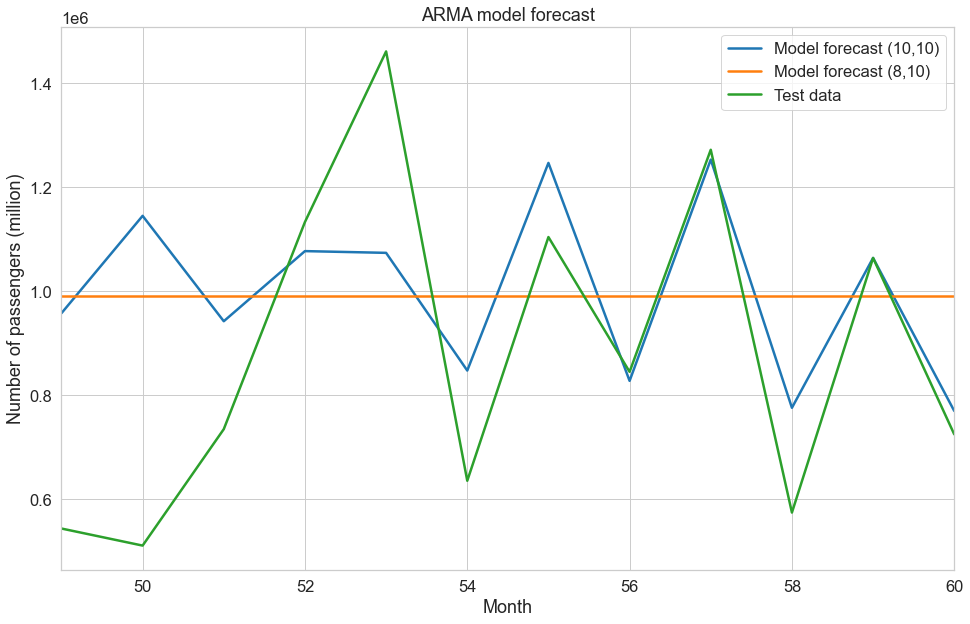

In [55]:
ARMA_model = ARIMA(train_set['passenger_count'], order=(10, 0, 10))
res_ARMA = ARMA_model.fit()
yhat_ARMA = res_ARMA.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

ARMA_model2 = ARIMA(train_set['passenger_count'], order=(8, 0, 10))
res_ARMA2 = ARMA_model2.fit()
yhat_ARMA2 = res_ARMA2.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARMA)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('ARMA model forecast')
ax.set_xlim(49,60)
bx = sns.lineplot(data=yhat_ARMA2)
cx = sns.lineplot(data=test_set['passenger_count'])
plt.legend(labels=["Model forecast (10,10)", "Model forecast (8,10)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [64]:
MAE = median_absolute_error(test_set['passenger_count'], yhat_ARMA)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_ARMA,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_ARMA)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_ARMA)
print("ARMA(10,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE = median_absolute_error(test_set['passenger_count'], yhat_ARMA2)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_ARMA2,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_ARMA2)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_ARMA2)
print("\nARMA(8,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARMA(10,10):
MAE=171997.300
RMSE=270531.145
MAPE=0.293
MASE=0.833

ARMA(8,10):
MAE=273615.000
RMSE=319555.390
MAPE=0.398
MASE=1.228


In [61]:
# evaluate an ARIMA model for a given order (p,d,q)

#ARiMA model
p_values = [0,1,2,4,8,10]
d_values = range(0,3)
q_values = [0,1,2,4,8,10]
ARIMA1 = pd.DataFrame(columns=['order','AICc','MASE'])
ARIMA2 = evaluate_ARIMA(train_set['passenger_count'],test_set['passenger_count'] , p_values, d_values, q_values,ARIMA1)
warnings.filterwarnings("ignore")
ARIMA2.head()

Best ARIMA(8, 0, 10) AICc=71.111
Best ARIMA(10, 0, 10) MASE=0.833


order         AICc      MASE
0  (0, 0, 0)  1443.853119  1.228362
1  (0, 0, 1)  1302.195779  1.228362
2  (0, 0, 2)  1304.039508  1.220768
3  (0, 0, 4)  1307.514835  1.198852
4  (0, 0, 8)  1321.119955  1.134166

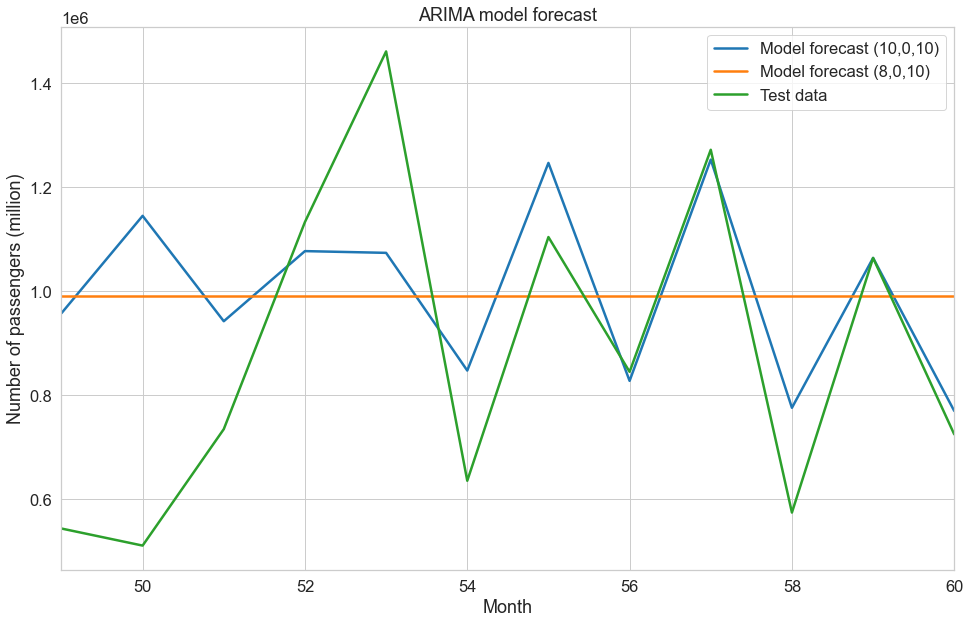

In [76]:
ARIMA_model = ARIMA(train_set['passenger_count'], order=(10, 0, 10))
res_ARIMA = ARIMA_model.fit()
yhat_ARIMA = res_ARIMA.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

ARIMA_model2 = ARIMA(train_set['passenger_count'], order=(8, 0, 10))
res_ARIMA2 = ARIMA_model2.fit()
yhat_ARIMA2 = res_ARIMA2.predict(start=len(train_set['passenger_count'])+1, end=(len(df_date)), dynamic=False)

plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=yhat_ARMA)
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('ARIMA model forecast')
ax.set_xlim(49,60)
bx = sns.lineplot(data=yhat_ARMA2)
cx = sns.lineplot(data=test_set['passenger_count'])
plt.legend(labels=["Model forecast (10,0,10)", "Model forecast (8,0,10)","Test data"])
plt.show()
warnings.filterwarnings("ignore")

In [66]:
MAE = median_absolute_error(test_set['passenger_count'], yhat_ARIMA)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_ARIMA,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_ARIMA)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_ARIMA)
print("ARIMA(10,0,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

MAE = median_absolute_error(test_set['passenger_count'], yhat_ARIMA2)
RMSE = mean_squared_error(test_set['passenger_count'], yhat_ARIMA2,squared=False)
MAPE = mean_absolute_percentage_error(test_set['passenger_count'], yhat_ARIMA2)
MASE = MASE_func(train_set['passenger_count'],test_set['passenger_count'],yhat_ARIMA2)
print("\nARIMA(8,,0,10):")
print('MAE=%.3f'% MAE)
print('RMSE=%.3f'% RMSE)
print('MAPE=%.3f'% MAPE)
print('MASE=%.3f'% MASE)

ARIMA(10,0,10):
MAE=171997.300
RMSE=270531.145
MAPE=0.293
MASE=0.833

ARIMA(8,,0,10):
MAE=273615.000
RMSE=319555.390
MAPE=0.398
MASE=1.228


## 3. Forecasting

In this section we present the forecasting of the passenger traffic for the following 12 months. As can be seen, the forecast seems comaptible with the time series.

In [82]:
forecast_model = ARIMA(train_set['passenger_count'], order=(10, 0, 10))
res_forecast = forecast_model.fit()
yhat_forecast = res_ARIMA.predict(start=len(df_date)+1, end=(len(df_date))+12, dynamic=False)
print(yhat_forecast)

61    1.047496e+06
62    8.298202e+05
63    1.199592e+06
64    8.411815e+05
65    1.150590e+06
66    8.802532e+05
67    9.935491e+05
68    1.101829e+06
69    9.157559e+05
70    1.231785e+06
71    8.384794e+05
72    1.101173e+06
Name: predicted_mean, dtype: float64


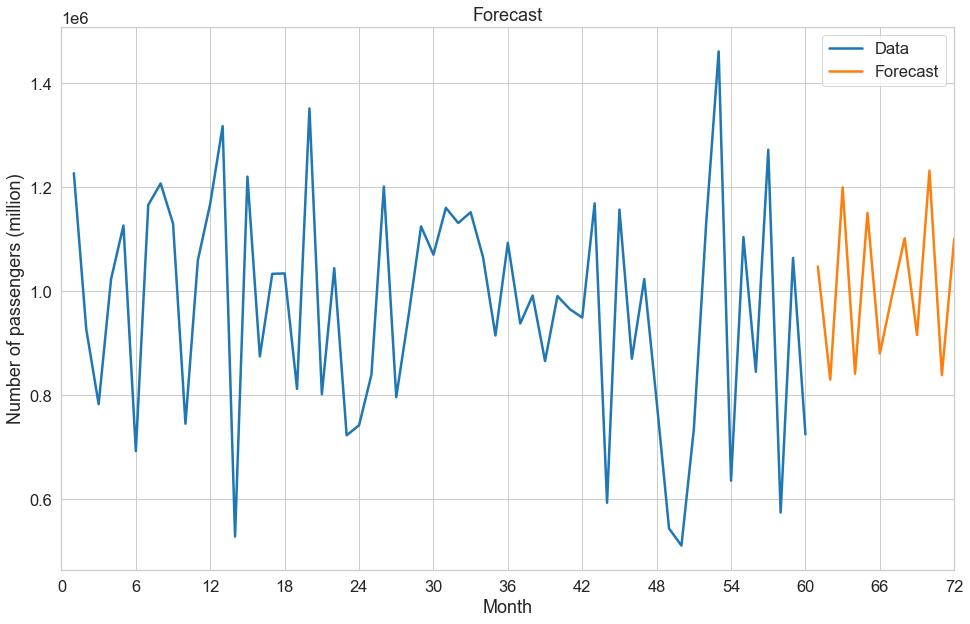

In [77]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(data=df['passenger_count'])
ax.set(xlabel='Month', ylabel = 'Number of passengers (million)')
ax.set_title('Forecast')
ax.set_xlim(0,72)
ax.set_xticks(np.arange(0, 72 + 1, 6))
bx = sns.lineplot(data=yhat_forecast)
plt.legend(labels=["Data","Forecast"])
plt.show()
warnings.filterwarnings("ignore")

## 4. Conclusion

In this notebook, we were abale to analyze and forecast a time series. After preparing the data, we did an intial exploratory analysis to verify if there were any seasonal or ciclic pattern in the time series. Then, started constructing our forecast model.Fisrt, we split the data in training and testing data sets and used a simple average forecast. This method did not performed well, so we tested ARIMA models. To use this type of model, we needed to confirm that the data was really stationary as the exploratory analysis suggested. We did this by using the ADH and KPSS tests. After we tested several ARIMA models:

1. Autoregressive model (AR)
2. Moving average model (MA)
3. Autoregressive moving average model (ARMA)
4. Autoregressive integrated moving average model (ARIMA)

We verified that the best model for forcastings based on our time series is an ARMA(10,10), equivalent to an ARIMA(10,0,10). The mean absolute scaled error (MASE) of 0.833 when we applied our model to the testing set, showed that our model perfomrs better than the naive method. Therefore, we are confident that our model will make the best possible predictions based on the data available.